In [2]:
#Mauricio Hernández Matías A01651328
#reto'''A través de Python debemos obtener conclusiones del archivo cvs por lo 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import pandas as pd #Utilizamos la biblioteca pandas para obtener una función que en automático lea el csv
dataframe=pd.read_csv("covid19_tweets.csv")#Función para leer csv
pd.set_option('display.max_rows',10)#aquí limitas el númeddsro de lineas (n-1) que mse mostrarán 
print(dataframe)#Esto sólo es necesario para mostrar lo que hace la función

                      user_name         user_location  \
0                        ᏉᎥ☻լꂅϮ            astroworld   
1                 Tom Basile 🇺🇸          New York, NY   
2               Time4fisticuffs      Pewee Valley, KY   
3                   ethel mertz  Stuck in the Middle    
4                      DIPR-J&K     Jammu and Kashmir   
...                         ...                   ...   
74431             Laura Wolfrom         Lexington, KY   
74432  Professor Tonya M. Evans         😷 #stayathome   
74433        People's Daily app           北京, 中华人民共和国   
74434                     M0ser                   NaN   
74435    Your Friend & Sabre ⚔️           Chicago, IL   

                                        user_description         user_created  \
0      wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1      Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2      #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:

# Análisis Estadístico

In [11]:
dataframe.describe()#Igualmente usamos una función de la librería de pandas para obtener un análisis estadístico de los datos (obviamente solo es un análisis sobre las columnas con datos cuantificables)

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


In [12]:
dataframe.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

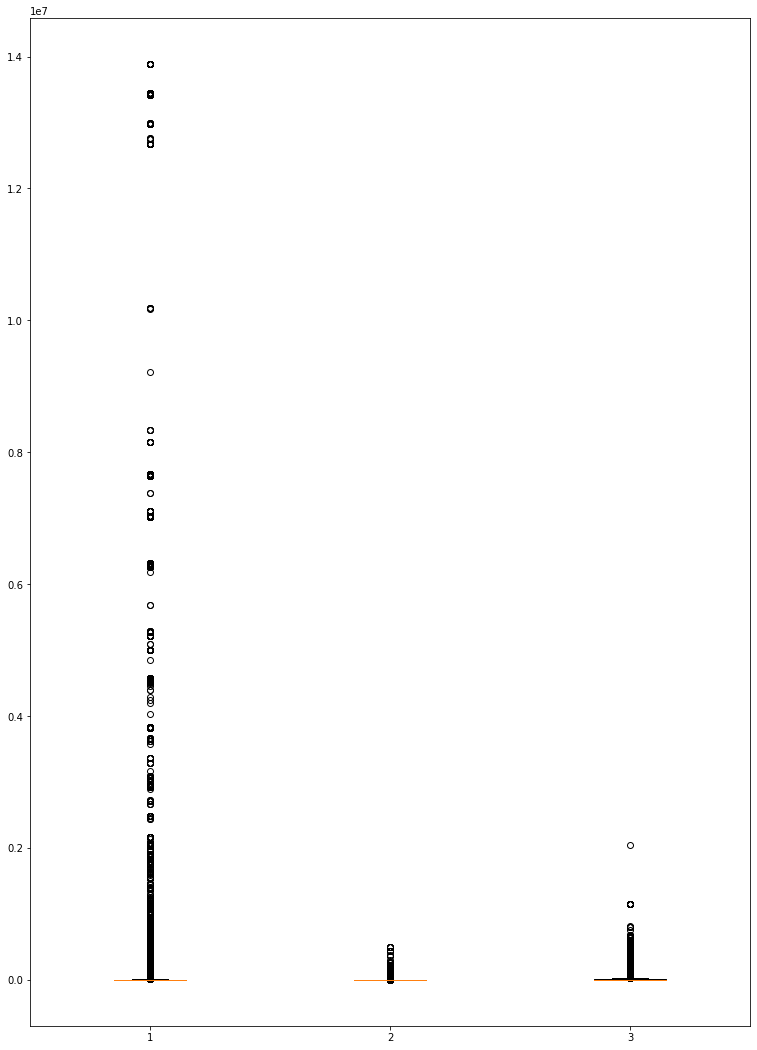

In [13]:
import matplotlib.pyplot as plt
data_1 = dataframe['user_followers']
data_2 = dataframe['user_friends']
data_3 = dataframe['user_favourites']
matrizGrafico = [data_1, data_2, data_3] 
fig = plt.figure(figsize=(10,14))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(matrizGrafico)

plt.show()


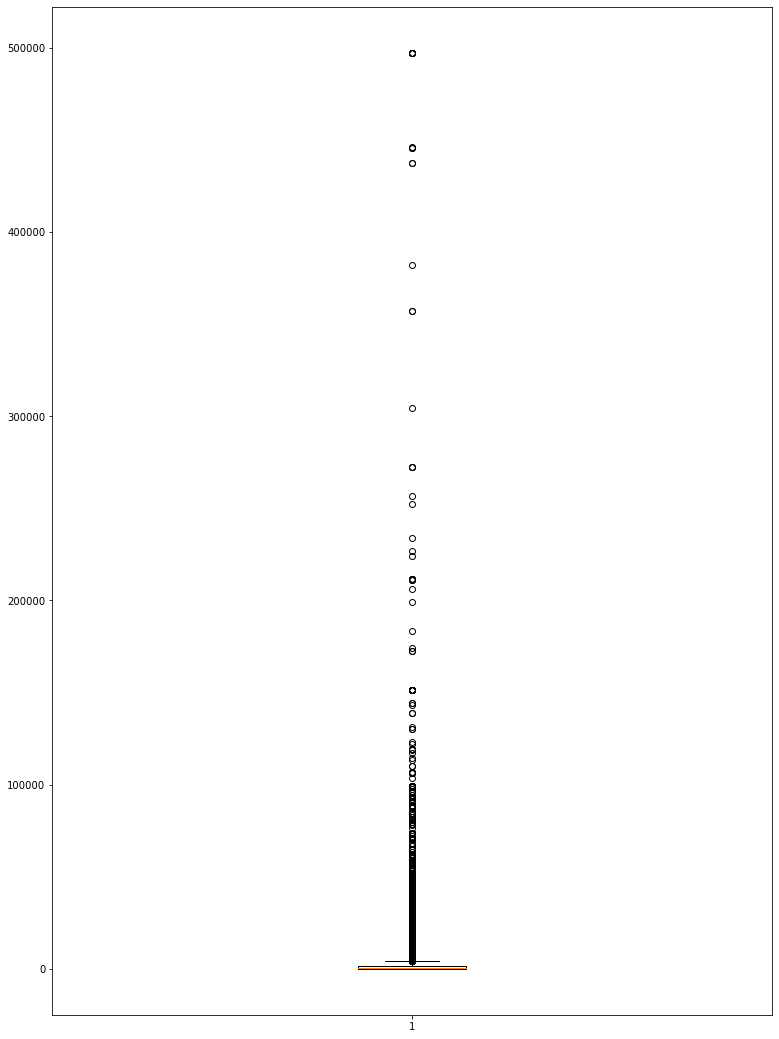

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,14))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data_2)

plt.show()

# Correlación

In [5]:
dataframe.corr(method ='spearman') 

,user_followers,user_friends,user_favourites,user_verified,is_retweet
user_followers,1.000000,0.536727,0.347642,0.508528,NaN
user_friends,0.536727,1.000000,0.603168,-0.003812,NaN
user_favourites,0.347642,0.603168,1.000000,-0.039434,NaN
user_verified,0.508528,-0.003812,-0.039434,1.000000,NaN
is_retweet,NaN,NaN,NaN,NaN,NaN


In [15]:
data_1 = dataframe['user_followers']
data_2 = dataframe['user_friends']
data_3 = dataframe['user_favourites']
print("El máximo valor de followers registrado es "+str(max(data_1)))
print("El mínimo valor de followers registrado es "+str(min(data_1)))
print("El máximo valor de amigos registrado es "+str(max(data_2)))
print("El mínimo valor de amigos registrado es "+str(min(data_2)))
print("El máximo valor de favoritos registrado es "+str(max(data_3)))
print("El mínimo valor de favoritos registrado es "+str(min(data_3)))

El máximo valor de followers registrado es 13892841
El mínimo valor de followers registrado es 0
El máximo valor de amigos registrado es 497363
El mínimo valor de amigos registrado es 0
El máximo valor de favoritos registrado es 2047197
El mínimo valor de favoritos registrado es 0


In [16]:
dataframe.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

# K-means de 'user verified'

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


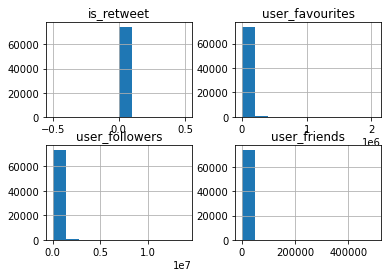

C:\Users\mauhm\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


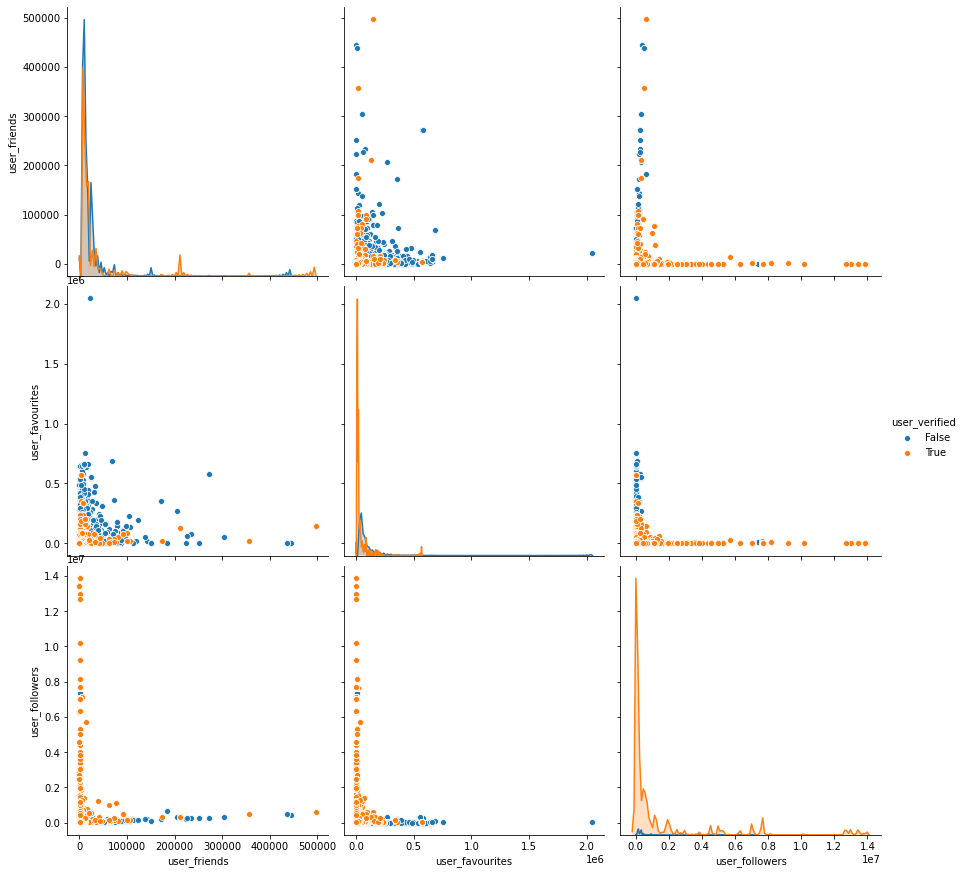

In [6]:
dataframe.drop(['user_verified'],1).hist()
plt.show()
sb.pairplot(dataframe.dropna(), hue='user_verified',size=4,vars=["user_friends","user_favourites","user_followers"],kind='scatter')

In [7]:
#Sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["user_friends","user_favourites","user_followers"]])
y = np.array(dataframe['user_verified'])
X.shape
y

array([False,  True, False, ..., False, False, False])

<ipython-input-177-d63c75e6258a>:14: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  asignar.append(colores[row])


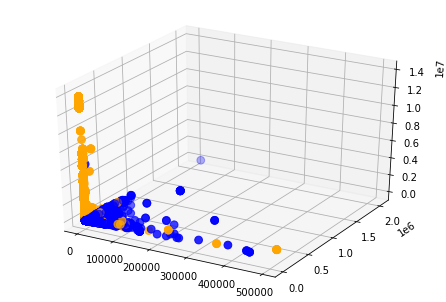

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','orange']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:,0], X[:,1], X[:,2], c=asignar, s=60)

# Valor de K

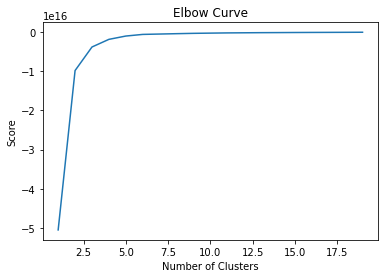

In [8]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
#Por lo tanto k=3
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.17082296e+03 1.54349135e+04 3.11669314e+04]
 [2.19937888e+02 8.03913043e+01 1.30086912e+07]
 [7.11316832e+02 2.63207921e+03 5.76923429e+06]]


[[2.17082296e+03 1.54349135e+04 3.11669314e+04]
 [2.19937888e+02 8.03913043e+01 1.30086912e+07]
 [7.11316832e+02 2.63207921e+03 5.76923429e+06]]


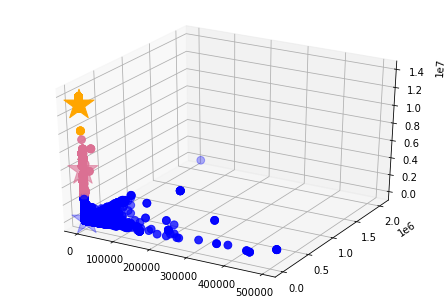

In [15]:
from mpl_toolkits.mplot3d import Axes3D
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['blue','orange','palevioletred']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=asignar, s=60)
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c=colores, s=1000)



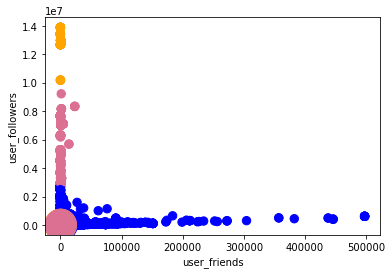

[[2.17082296e+03 1.54349135e+04 3.11669314e+04]
 [2.19937888e+02 8.03913043e+01 1.30086912e+07]
 [7.11316832e+02 2.63207921e+03 5.76923429e+06]]


In [21]:
f1 = dataframe['user_friends'].values
f2 = dataframe['user_followers'].values

plt.figure()
colores=['blue','orange','palevioletred']
plt.scatter(f1, f2, c=asignar, s=70)

plt.scatter(C[:,0], C[:,1], c=colores, s=1000)

plt.xlabel('user_friends')
plt.ylabel('user_followers')
plt.show()
print(C)

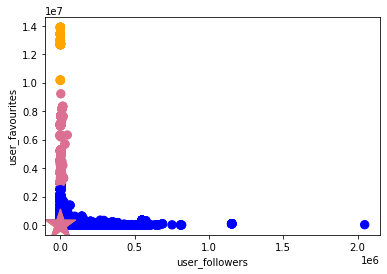

In [19]:
import random
f1 = dataframe['user_favourites'].values
f2 = dataframe['user_followers'].values

plt.xlabel('user_followers')
plt.ylabel('user_favourites')
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.show()

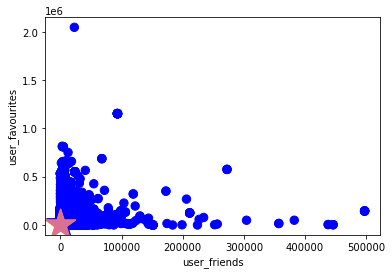

In [189]:

f1 = dataframe['user_friends'].values
f2 = dataframe['user_favourites'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], marker="*", c=colores, s=1000)
plt.xlabel('user_friends')
plt.ylabel('user_favourites')
plt.show()

In [192]:
copy =  pd.DataFrame()


copy['user_name']=dataframe['user_name'].values
copy['user_verified']=dataframe['user_verified'].values
copy['label'] = labels
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo



,color,cantidad
0,blue,73670
1,orange,161
2,palevioletred,605


In [193]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['user_verified']=dataframe['user_verified']
diversidadGrupo['cantidad']=group_referrals.groupby('user_verified').size()
diversidadGrupo

,user_verified,cantidad
0,False,65079.0
1,True,8591.0
2,False,NaN
3,False,NaN
4,False,NaN
...,...,...
74431,False,NaN
74432,False,NaN
74433,False,NaN
74434,False,NaN


# K-means con otro valor de K para cuestionarse

In [131]:
#Por lo tanto k=2
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
C=centroids

[[2.16848998e+03 1.54172101e+04 3.55807633e+04]
 [6.36509716e+02 2.09460688e+03 7.86532998e+06]]


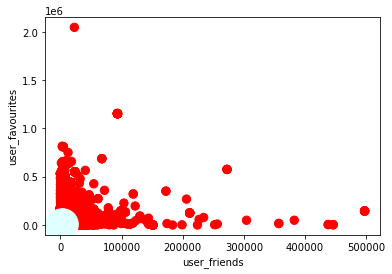

In [132]:
import random
f1 = dataframe['user_friends'].values
f2 = dataframe['user_favourites'].values
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple','royalblue','gray','crimson','darkviolet','navy','tomato','magenta','indigo','m','skyblue','lightcoral','maroon','mistyrose','coral','seashell','orange','g','fuchsia','hotpink','orchid','azure','aqua','y','ivory','salmon','brown','dimgrey','teal','lime','lavender','cornsilk','chocolate','olive','gold','tan','peru','lightcyan','steelblue','mediumvioletred','royalblue','palevioletred','beige','limegreen','turquoise','violet','plum','magenta','lavenderblush','lemonchiffon','bisque','darksalmon']
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], c=random.choice(colores), s=1000)
plt.xlabel('user_friends')
plt.ylabel('user_favourites')
plt.show()

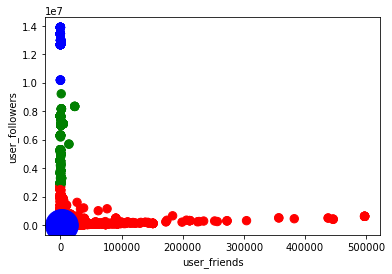

In [133]:
import random
f1 = dataframe['user_friends'].values
f2 = dataframe['user_followers'].values

plt.xlabel('user_friends')
plt.ylabel('user_followers')
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], c=random.choice(colores), s=1000)
plt.show()

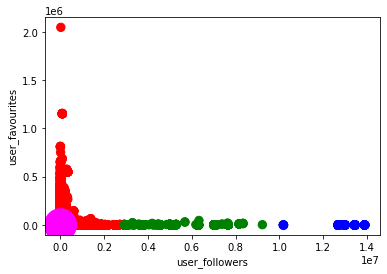

In [134]:
import random
f1 = dataframe['user_followers'].values
f2 = dataframe['user_favourites'].values

plt.xlabel('user_followers')
plt.ylabel('user_favourites')
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0], C[:,1], c=random.choice(colores), s=1000)
plt.show()